# Testing `calc_rsq()`

We're getting weird results from our iterations, so let's see what's going on. I'm going to run through this code in python2 and python3.

In [1]:
import sys
print (sys.version)

2.7.12 |Continuum Analytics, Inc.| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline

/home/jflournoy/miniconda3/envs/kidsPy2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
def calc_rsq(av_corr_mat_A, av_corr_mat_B):
    """
    From wikipedia: https://en.wikipedia.org/wiki/Coefficient_of_determination
    
    Rsq = 1 - (SSres / SStot)
    
    SSres is calculated as the sum of square errors (where the error
    is the difference between x and y).
    
    SStot is calculated as the total sum of squares in y.
    """
    # Get the data we need
    inds = np.triu_indices_from(av_corr_mat_B, k=1)
    x = av_corr_mat_A[inds]
    y = av_corr_mat_B[inds]
    
    # Calculate the error/residuals
    res = y - x

    SSres = np.sum(res**2)
    
    # Sum up the total error in y
    y_var = y - np.mean(y)
    
    SStot = np.sum(y_var**2)
    
    # R squared
    Rsq = 1 - (SSres/SStot)
    
    return Rsq

## Generate random correlation matrices

In [4]:
df1 = pd.DataFrame(np.random.normal(0, 1, size=(100, 20)))
df2 = pd.DataFrame(np.random.normal(0, 1, size=(100, 20)))
df1corrmat = df1.corr()
df2corrmat = df2.corr()

In [5]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.055640,1.512612,0.735888,-0.196452,-0.216515,0.904850,0.551909,-1.538587,0.358426,0.530131,0.645912,-0.257739,-0.884687,-0.053250,0.181911,0.573726,-1.407255,1.641799,0.087086,-1.452274
1,-2.154519,-1.989354,-0.733126,1.762634,-0.588855,-0.295523,0.027152,0.005979,-0.403672,0.803702,0.044962,0.436148,-1.671332,-0.370949,0.752853,0.243152,-0.909387,-0.188488,0.124392,0.659078
2,-0.747512,-0.269158,-0.089920,0.607347,-0.809505,-0.659259,1.030085,0.449917,0.487897,-0.202785,1.366128,0.399873,1.270250,-0.339279,-1.236108,-1.090876,1.026717,-0.498959,-0.373106,0.231553
3,1.312038,-0.228906,-1.434094,1.188960,-0.119236,-2.722678,-0.363951,-1.052348,2.202005,-0.609376,-0.030595,-0.303323,0.314084,-0.689706,0.431796,-0.146887,-1.359664,-1.454056,-0.713643,-0.512765
4,-1.350703,1.369818,0.994983,-1.298466,0.751251,0.102326,1.211105,1.311580,-0.805233,-1.514801,-0.224046,0.892157,2.366844,0.357910,1.305209,0.834339,-0.129287,0.745044,0.951697,-1.219575


In [6]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.481741,-0.126530,-1.526180,-1.755097,-1.359404,1.353500,-0.554771,-0.387369,0.053631,0.020083,0.792746,1.729616,0.717472,1.011916,1.100349,0.476507,2.493049,-0.695657,-0.607241,1.171680
1,-0.002637,1.445192,0.844643,0.678230,-0.653058,-0.440393,-0.433633,-0.287185,0.307637,-0.522157,0.630379,-0.423860,1.488721,0.165271,0.540141,0.001891,-0.464489,-0.956190,-0.705365,0.250638
2,-0.172612,-2.129120,-1.114995,-1.881684,0.279684,-0.616079,1.289964,-0.924920,1.270055,-1.253096,0.166709,1.823443,-0.279950,-0.200283,-0.668185,1.418917,-1.321706,-0.299116,-1.287807,-0.588500
3,-0.307816,-2.082119,1.766715,-1.629741,-0.850625,-0.255811,-0.086605,-0.790352,1.104164,-0.583218,-0.497299,0.047918,0.071793,-1.009099,-0.127210,-0.748865,0.679903,-0.162098,-0.415079,0.239912
4,0.443282,-0.355320,0.343230,0.076101,0.170259,1.308542,1.554031,-1.755391,-0.121759,-0.261235,-1.216196,0.484196,-2.153433,-3.187546,0.984768,1.093976,-0.186322,0.100168,-0.066713,0.265887


In [7]:
df1corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.022981,-0.003251,0.079556,-0.024256,-0.075125,0.055348,0.008935,0.060390,-0.046443,-0.072778,-0.100979,-0.119996,-0.146191,-0.028657,-0.058557,-0.030130,-0.145506,0.176320,-0.123878
1,-0.022981,1.000000,-0.116256,-0.098974,-0.047203,0.156665,0.013945,-0.183282,0.169918,-0.126153,0.028399,-0.043967,-0.060902,-0.162202,0.015408,-0.132974,-0.129763,0.045754,-0.093430,-0.124811
2,-0.003251,-0.116256,1.000000,0.060497,-0.085920,-0.053784,-0.102440,-0.022010,0.017837,0.026057,0.054382,-0.055135,0.081387,0.107351,0.055792,-0.063357,-0.147698,0.155392,0.104769,-0.007317
3,0.079556,-0.098974,0.060497,1.000000,-0.028266,-0.138103,-0.054183,-0.011220,-0.121161,0.108943,-0.047016,-0.134242,-0.145179,-0.128420,0.041962,-0.117658,0.031692,-0.230391,0.040642,-0.008998
4,-0.024256,-0.047203,-0.085920,-0.028266,1.000000,-0.066372,-0.121923,0.061821,-0.063572,-0.078551,0.001476,0.203256,0.053176,0.175035,0.128425,-0.086109,-0.003167,-0.083728,-0.016489,-0.167774


In [8]:
df2corrmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.080499,-0.096901,0.212224,0.095901,-0.107080,0.063214,-0.132513,0.090670,-0.138016,-0.001526,-0.021655,0.003233,-0.088722,-0.055523,0.235366,-0.053579,0.011951,0.106103,-0.154219
1,0.080499,1.000000,-0.054979,0.176227,0.086226,0.058544,0.058641,0.018827,-0.130001,0.095419,0.026449,-0.036886,0.066718,-0.068192,0.086792,0.088197,0.000701,0.055007,0.032109,0.052019
2,-0.096901,-0.054979,1.000000,0.042271,-0.050222,0.057839,0.047662,0.084182,0.090247,0.013070,0.165525,-0.121131,0.021698,0.049598,-0.083911,0.103072,-0.050197,0.079074,-0.136556,-0.068713
3,0.212224,0.176227,0.042271,1.000000,0.081277,-0.065349,0.070908,0.104384,-0.086779,0.053862,-0.028715,-0.016287,-0.063257,-0.008876,0.042010,-0.122628,0.000534,0.066381,0.136511,-0.140364
4,0.095901,0.086226,-0.050222,0.081277,1.000000,-0.040711,-0.048301,0.041287,0.016508,-0.086873,-0.144587,0.106172,0.128383,-0.091407,0.036639,0.268731,-0.180559,0.119859,0.081776,-0.086327


## Calculate $R^2$ from random matrices

In [10]:
calc_rsq(df1.corr().as_matrix(), df2.corr().as_matrix())

-0.94010995647153583

Now let's walk through the code above to see what it's doing.

In [11]:
inds = np.triu_indices_from( df2.corr().as_matrix(), k=1)
inds

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13,
        13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16,
        17, 17, 18]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14

In [12]:
x =  df1.corr().as_matrix()[inds]
y =  df2.corr().as_matrix()[inds]

In [13]:
print(str(df1.corr().shape) + " matrix gives an upper triangle with length " + str((20*(20-1))/2))

(20, 20) matrix gives an upper triangle with length 190


`df.corr()` is a $20\times 20$ matrix, so getting the upper triangle should give us $\frac{20\cdot (20-1)}{2}=190$ cells in the upper triangle.

In [14]:
len(x)

190

Yay, we get what we expect!

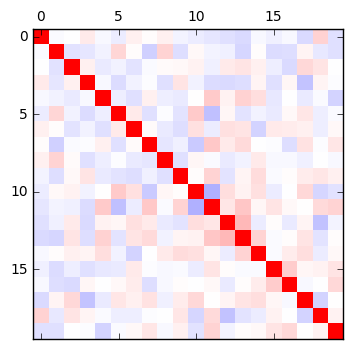

In [98]:
plt.matshow(df1.corr(), vmin=-1, vmax=1, cmap='bwr')

In [15]:
df1.corr().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.00,-0.02,-0.00,0.08,-0.02,-0.08,0.06,0.01,0.06,-0.05,-0.07,-0.10,-0.12,-0.15,-0.03,-0.06,-0.03,-0.15,0.18,-0.12
1,-0.02,1.00,-0.12,-0.10,-0.05,0.16,0.01,-0.18,0.17,-0.13,0.03,-0.04,-0.06,-0.16,0.02,-0.13,-0.13,0.05,-0.09,-0.12
2,-0.00,-0.12,1.00,0.06,-0.09,-0.05,-0.10,-0.02,0.02,0.03,0.05,-0.06,0.08,0.11,0.06,-0.06,-0.15,0.16,0.10,-0.01
3,0.08,-0.10,0.06,1.00,-0.03,-0.14,-0.05,-0.01,-0.12,0.11,-0.05,-0.13,-0.15,-0.13,0.04,-0.12,0.03,-0.23,0.04,-0.01
4,-0.02,-0.05,-0.09,-0.03,1.00,-0.07,-0.12,0.06,-0.06,-0.08,0.00,0.20,0.05,0.18,0.13,-0.09,-0.00,-0.08,-0.02,-0.17
5,-0.08,0.16,-0.05,-0.14,-0.07,1.00,0.09,-0.12,-0.01,-0.11,0.21,-0.24,0.04,-0.11,-0.05,-0.08,0.03,0.10,-0.07,-0.02
6,0.06,0.01,-0.10,-0.05,-0.12,0.09,1.00,0.02,-0.08,-0.13,0.12,-0.08,0.12,0.11,-0.17,0.08,0.07,0.06,-0.07,0.03
7,0.01,-0.18,-0.02,-0.01,0.06,-0.12,0.02,1.00,-0.10,-0.06,-0.21,0.22,0.08,0.15,-0.00,-0.01,-0.13,0.11,-0.01,0.10
8,0.06,0.17,0.02,-0.12,-0.06,-0.01,-0.08,-0.10,1.00,-0.12,0.03,-0.02,-0.08,-0.05,0.08,-0.02,-0.02,-0.06,-0.01,-0.03
9,-0.05,-0.13,0.03,0.11,-0.08,-0.11,-0.13,-0.06,-0.12,1.00,0.01,0.17,-0.11,0.05,0.13,-0.02,0.01,0.08,0.09,0.06


In [16]:
x.round(2)

array([-0.02, -0.  ,  0.08, -0.02, -0.08,  0.06,  0.01,  0.06, -0.05,
       -0.07, -0.1 , -0.12, -0.15, -0.03, -0.06, -0.03, -0.15,  0.18,
       -0.12, -0.12, -0.1 , -0.05,  0.16,  0.01, -0.18,  0.17, -0.13,
        0.03, -0.04, -0.06, -0.16,  0.02, -0.13, -0.13,  0.05, -0.09,
       -0.12,  0.06, -0.09, -0.05, -0.1 , -0.02,  0.02,  0.03,  0.05,
       -0.06,  0.08,  0.11,  0.06, -0.06, -0.15,  0.16,  0.1 , -0.01,
       -0.03, -0.14, -0.05, -0.01, -0.12,  0.11, -0.05, -0.13, -0.15,
       -0.13,  0.04, -0.12,  0.03, -0.23,  0.04, -0.01, -0.07, -0.12,
        0.06, -0.06, -0.08,  0.  ,  0.2 ,  0.05,  0.18,  0.13, -0.09,
       -0.  , -0.08, -0.02, -0.17,  0.09, -0.12, -0.01, -0.11,  0.21,
       -0.24,  0.04, -0.11, -0.05, -0.08,  0.03,  0.1 , -0.07, -0.02,
        0.02, -0.08, -0.13,  0.12, -0.08,  0.12,  0.11, -0.17,  0.08,
        0.07,  0.06, -0.07,  0.03, -0.1 , -0.06, -0.21,  0.22,  0.08,
        0.15, -0.  , -0.01, -0.13,  0.11, -0.01,  0.1 , -0.12,  0.03,
       -0.02, -0.08,

These also match, so that's good. Time to walk through the $R^2$ calculation.

In [17]:
res = y - x
res

array([  1.03480485e-01,  -9.36495976e-02,   1.32667630e-01,
         1.20156300e-01,  -3.19552690e-02,   7.86567956e-03,
        -1.41447666e-01,   3.02797871e-02,  -9.15729568e-02,
         7.12522270e-02,   7.93242396e-02,   1.23228565e-01,
         5.74691386e-02,  -2.68656216e-02,   2.93923481e-01,
        -2.34489250e-02,   1.57456534e-01,  -7.02171241e-02,
        -3.03416686e-02,   6.12767430e-02,   2.75201042e-01,
         1.33429338e-01,  -9.81203631e-02,   4.46951659e-02,
         2.02109416e-01,  -2.99919065e-01,   2.21571539e-01,
        -1.94979414e-03,   7.08046455e-03,   1.27619991e-01,
         9.40100452e-02,   7.13842482e-02,   2.21171564e-01,
         1.30463790e-01,   9.25279756e-03,   1.25538271e-01,
         1.76829519e-01,  -1.82258120e-02,   3.56980499e-02,
         1.11623411e-01,   1.50102260e-01,   1.06191960e-01,
         7.24102816e-02,  -1.29867725e-02,   1.11142487e-01,
        -6.59953962e-02,  -5.96890151e-02,  -5.77535117e-02,
        -1.39702537e-01,

In [18]:
SSres = np.sum(res**2)
SSres

3.9556449629293224

In [19]:
# Sum up the total error in y
y_var = y - np.mean(y)
y_var

array([ 0.07288018, -0.10452039,  0.20460469,  0.08828125, -0.11469913,
        0.05559471, -0.14013208,  0.08305075, -0.14563508, -0.00914551,
       -0.02927403, -0.00438674, -0.09634136, -0.06314191,  0.2277471 ,
       -0.06119818,  0.00433126,  0.09848357, -0.16183854, -0.06259828,
        0.16860751,  0.07860705,  0.05092518,  0.05102129,  0.01120772,
       -0.13762051,  0.08779941,  0.01882948, -0.04450551,  0.05909916,
       -0.07581102,  0.07917316,  0.0805778 , -0.00691812,  0.04738789,
        0.02448934,  0.04439946,  0.03465176, -0.05784115,  0.05022014,
        0.04004292,  0.07656291,  0.08262775,  0.00545111,  0.15790536,
       -0.12875011,  0.01407903,  0.04197846, -0.0915303 ,  0.09545248,
       -0.05781669,  0.07145507, -0.14417575, -0.07633211,  0.07365735,
       -0.07296861,  0.06328881,  0.09676456, -0.09439866,  0.04624264,
       -0.03633454, -0.02390665, -0.0708759 , -0.01649575,  0.03439112,
       -0.13024712, -0.00708485,  0.05876196,  0.12889195, -0.14

In [20]:
SStot = np.sum(y_var**2)
SStot

2.0388766882694762

In [21]:
# R squared
Rsq = 1 - (SSres/SStot)
Rsq

-0.94010995647153583

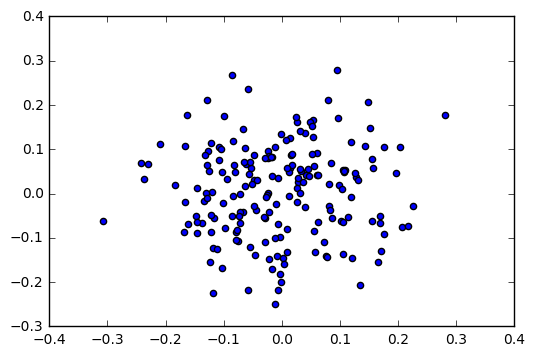

In [22]:
plt.scatter(x, y)

## Conclusion

Python 3: This works as expected, but we had to use `as_matrix()` to get it to not error in `calc_rsq()`.
Python 2: This works as expected, but we had to use `as_matrix()` to get it to not error in `calc_rsq()`.

# Real Data

In [27]:
behav_data_f = 'Phenotypic_V1_0b_preprocessed1.csv'

In [30]:
df = pd.read_csv(behav_data_f)
df = df.loc[df['func_perc_fd'].notnull(), :]
df = df.loc[df['FILE_ID']!='no_filename', :]
df['AGE_YRS'] = np.floor(df['AGE_AT_SCAN'])
df.head()

,Unnamed: 0,Unnamed: 0.1,SUB_ID,X,subject,SITE_ID,FILE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,...,qc_anat_rater_2,qc_anat_notes_rater_2,qc_func_rater_2,qc_func_notes_rater_2,qc_anat_rater_3,qc_anat_notes_rater_3,qc_func_rater_3,qc_func_notes_rater_3,SUB_IN_SMP,AGE_YRS
1,1,2,50003,2,50003,PITT,Pitt_0050003,1,1,24.45,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,24.0
2,2,3,50004,3,50004,PITT,Pitt_0050004,1,1,19.09,...,OK,NaN,OK,NaN,OK,NaN,OK,NaN,1,19.0
3,3,4,50005,4,50005,PITT,Pitt_0050005,1,1,13.73,...,OK,NaN,maybe,ic-parietal-cerebellum,OK,NaN,OK,NaN,0,13.0
4,4,5,50006,5,50006,PITT,Pitt_0050006,1,1,13.37,...,OK,NaN,maybe,ic-parietal slight,OK,NaN,OK,NaN,1,13.0
5,5,6,50007,6,50007,PITT,Pitt_0050007,1,1,17.78,...,OK,NaN,maybe,ic-cerebellum_temporal_lob,OK,NaN,OK,NaN,1,17.0


In [207]:
for i, (sub, f_id) in enumerate(df.loc[0:100,['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat = ts_df.corr()

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat1 = np.zeros([corr_mat.shape[0], corr_mat.shape[1], len(df)])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat1[:, :, i] = corr_mat

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat1 = np.nanmean(all_corr_mat1, axis=2)

for i, (sub, f_id) in enumerate(df.loc[100:200,['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat = ts_df.corr()

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat2 = np.zeros([corr_mat.shape[0], corr_mat.shape[1], len(df)])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat2[:, :, i] = corr_mat

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat2 = np.nanmean(all_corr_mat2, axis=2)

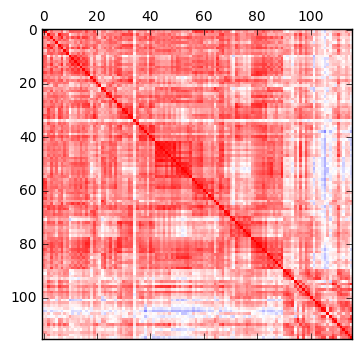

In [208]:
plt.matshow(all_corr_mat1[:,:,0], vmin=-1, vmax=1, cmap='bwr')

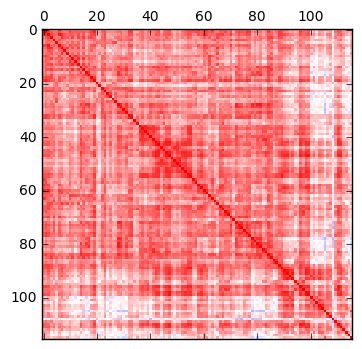

In [209]:
plt.matshow(all_corr_mat1[:,:,9], vmin=-1, vmax=1, cmap='bwr')

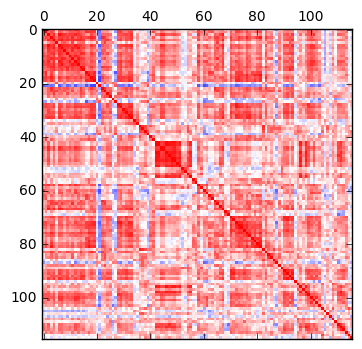

In [210]:
plt.matshow(all_corr_mat2[:,:,0], vmin=-1, vmax=1, cmap='bwr')

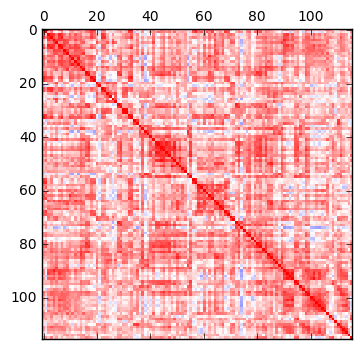

In [211]:
plt.matshow(all_corr_mat2[:,:,9], vmin=-1, vmax=1, cmap='bwr')

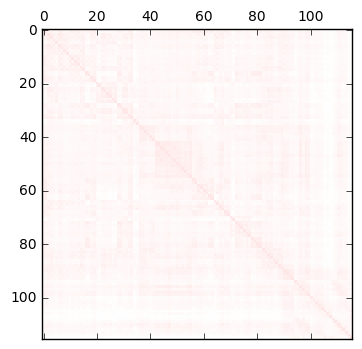

In [212]:
plt.matshow(av_corr_mat1, vmin=-1, vmax=1, cmap='bwr')

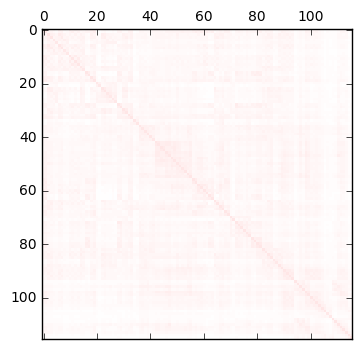

In [213]:
plt.matshow(av_corr_mat2, vmin=-1, vmax=1, cmap='bwr')

In [214]:
[(av_corr_mat1.min(), av_corr_mat1.max()), (av_corr_mat2.min(), av_corr_mat2.max())]

[(-0.0067167175213397618, 0.094777562862669251),
 (-0.0017487644028847729, 0.093810444874274659)]

Oh no...that's not good. We just get an average correlation of 0.

In [215]:
calc_rsq(av_corr_mat1, av_corr_mat2)

0.78724328641013896

Apparently nothing explains nothing extremely well.

In [216]:
np.arctanh([.5, .8, .9])

array([ 0.54930614,  1.09861229,  1.47221949])

Apparently we need to Fisher *z* transform them, which is equivalent to the arctanh function.

In [217]:
for i, (sub, f_id) in enumerate(df.loc[0:100,['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat_r = ts_df.corr()
    corr_mat_z = np.arctanh(corr_mat_r)

    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat1_z = np.zeros([corr_mat_z.shape[0], corr_mat_z.shape[1], len(df)])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat1_z[:, :, i] = corr_mat_z

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat1_z = np.nanmean(all_corr_mat1_z, axis=2)

for i, (sub, f_id) in enumerate(df.loc[100:200,['SUB_ID', 'FILE_ID']].values):
    #read each subjects aal roi time series files
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #create a correlation matrix from the roi all time series files
    corr_mat_r = ts_df.corr()
    corr_mat_z = np.arctanh(corr_mat_r)
    
    #for the first subject, add a correlation matrix of zeros that is the same dimensions as the aal roi-roi matrix
    if i == 0:
        all_corr_mat2_z = np.zeros([corr_mat_z.shape[0], corr_mat_z.shape[1], len(df)])

    #now add the correlation matrix you just created for each subject to the all_corr_mat matrix (3D)
    all_corr_mat2_z[:, :, i] = corr_mat_z

#create the mean correlation matrix (ignore nas - sometime there are some...)
av_corr_mat2_z = np.nanmean(all_corr_mat2_z, axis=2)

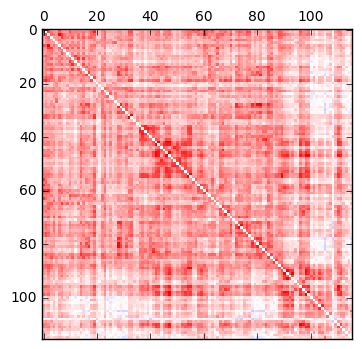

In [218]:
plt.matshow(all_corr_mat1_z[:,:,9], vmin=-1.5, vmax=1.5, cmap='bwr')

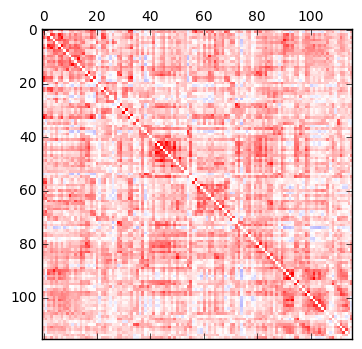

In [219]:
plt.matshow(all_corr_mat2_z[:,:,9], vmin=-1.5, vmax=1.5, cmap='bwr')

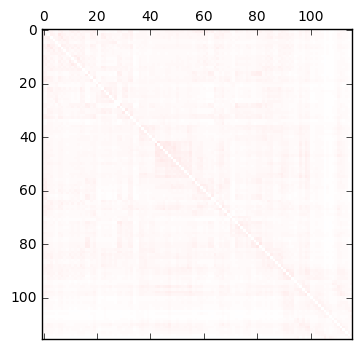

In [220]:
plt.matshow(av_corr_mat1_z, vmin=-1.5, vmax=1.5, cmap='bwr')

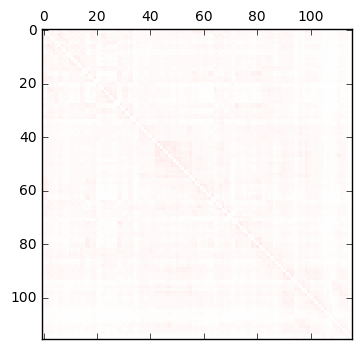

In [221]:
plt.matshow(av_corr_mat2_z, vmin=-1.5, vmax=1.5, cmap='bwr')

In [222]:
np.fill_diagonal(av_corr_mat1_z, 0)
np.fill_diagonal(av_corr_mat2_z, 0)

np.round([(av_corr_mat1_z.min(), av_corr_mat1_z.max()), (av_corr_mat2_z.min(), av_corr_mat2_z.max())],4)

array([[-0.0072,  0.1548],
       [-0.0019,  0.1404]])

In [223]:
calc_rsq(av_corr_mat1_z, av_corr_mat2_z)

0.81084579868016948